In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data

In [5]:
NUM_FOLDS = 10
MODELS = ['baseline', 'peb', 'onehot', 'embedding']
PATTERN = '/home/konradkaranowski/storage/personalized-nlp/storage/outputs/cartography_outputs/cartography_wiki_toxicity_model=$/metrics/class_toxicity/toxicity_fold_&_metrics.csv'

In [6]:
dfs = []
for model in MODELS:
    for fold in range(NUM_FOLDS):
        df = pd.read_csv(PATTERN.replace('$', model).replace('&', str(fold)))
        df['fold'] = fold
        df['model'] = model
        dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39674880 entries, 0 to 39674879
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   guid                 object 
 1   index                int64  
 2   threshold_closeness  float64
 3   confidence           float64
 4   variability          float64
 5   correctness          int64  
 6   forgetfulness        int64  
 7   fold                 int64  
 8   model                object 
dtypes: float64(3), int64(4), object(2)
memory usage: 2.7+ GB


# Calculate average variability over folds for each model

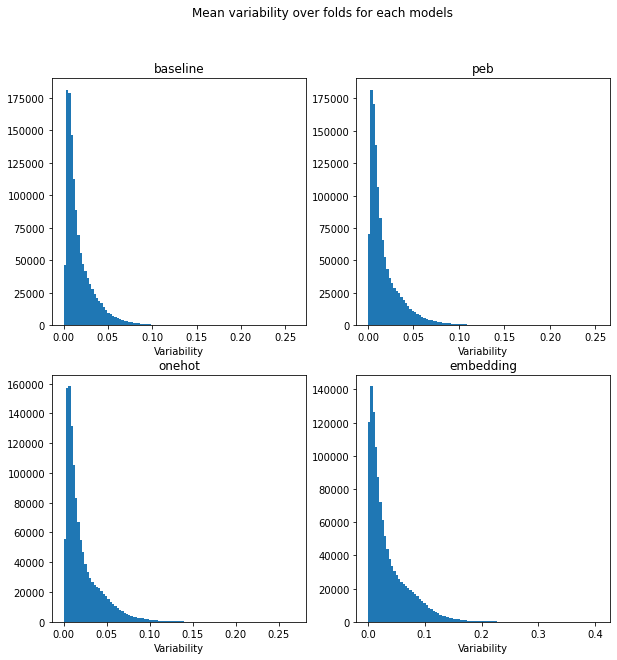

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Mean variability over folds for each models')
model_iterator = iter(MODELS)
for i in range(2):
    for j in range(2):
        model = next(model_iterator)
        df_model = df[df['model'] == model].groupby('guid').mean()['variability']
        ax[i, j].hist(df_model, bins=100)
        ax[i, j].set_title(model)
        ax[i, j].set_xlabel('Variability')
plt.show()

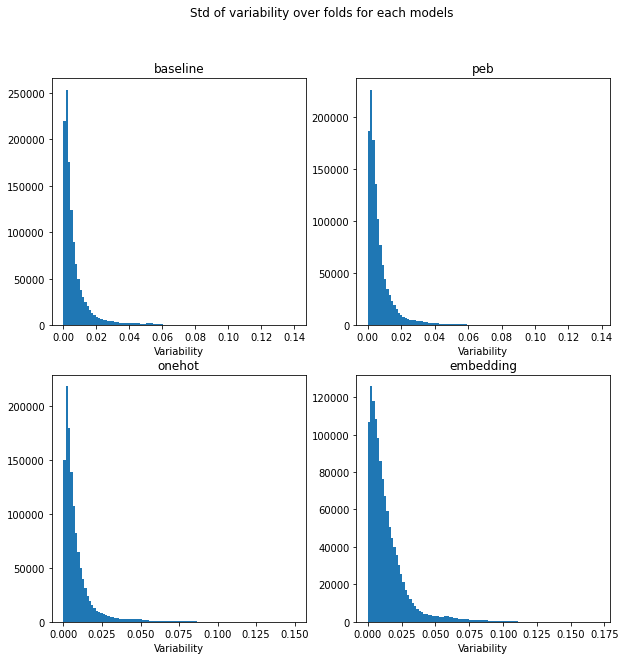

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Std of variability over folds for each models')
model_iterator = iter(MODELS)
for i in range(2):
    for j in range(2):
        model = next(model_iterator)
        df_model = df[df['model'] == model].groupby('guid').std()['variability']
        ax[i, j].hist(df_model, bins=100)
        ax[i, j].set_title(model)
        ax[i, j].set_xlabel('Variability')
plt.show()

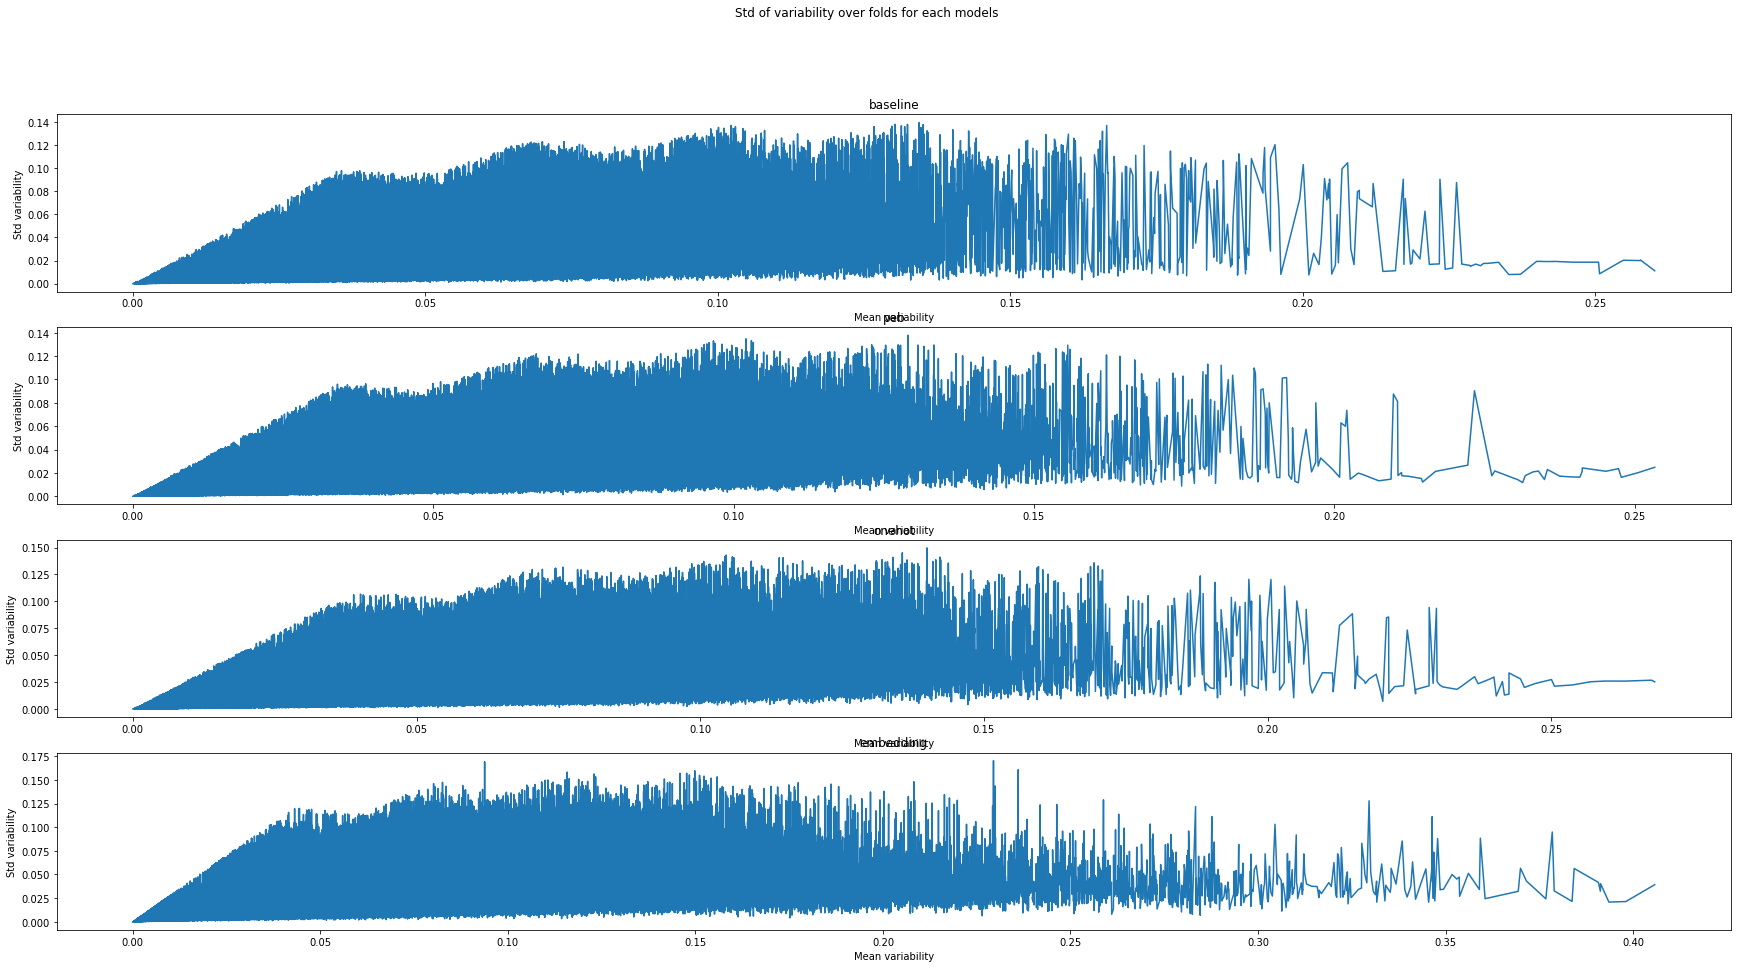

In [28]:
fig, ax = plt.subplots(4, 1, figsize=(30, 15))
fig.suptitle('Std of variability over folds for each models')
model_iterator = iter(MODELS)
for i in range(4):
    for j in range(1):
        model = next(model_iterator)
        df_model = df[df['model'] == model].groupby('guid').agg([np.mean, np.std])['variability']
        df_sorted = df_model.sort_values(by='mean', ascending=False)
        std = df_sorted['std']
        mean = df_sorted['mean']
        ax[i].plot(mean, std)
        ax[i].set_title(model)
        ax[i].set_ylabel('Std variability')
        ax[i].set_xlabel('Mean variability')
plt.show()

# Calculate variability over models

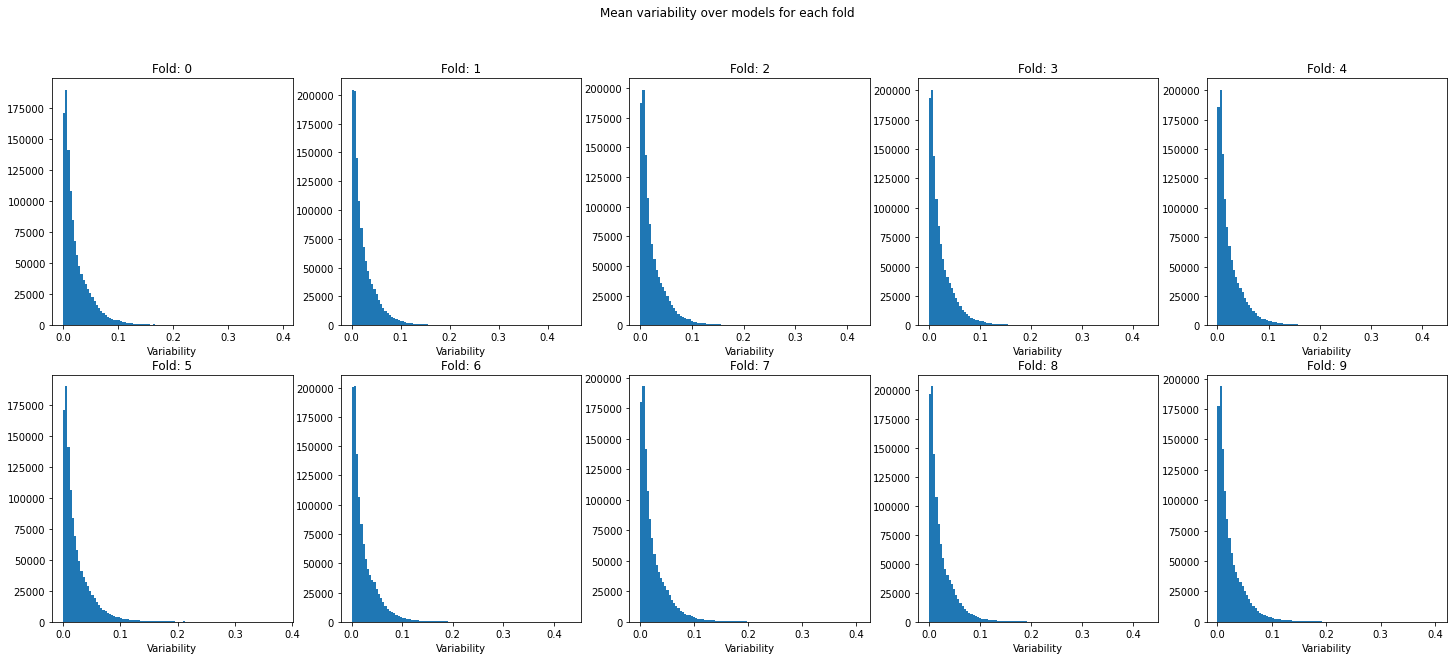

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('Mean variability over models for each fold')
fold_iterator = iter(range(NUM_FOLDS))
for i in range(2):
    for j in range(5):
        fold = next(fold_iterator)
        df_fold = df[df['fold'] == fold].groupby('guid').mean()['variability']
        ax[i, j].hist(df_fold, bins=100)
        ax[i, j].set_title(f'Fold: {fold}')
        ax[i, j].set_xlabel('Variability')
plt.show()

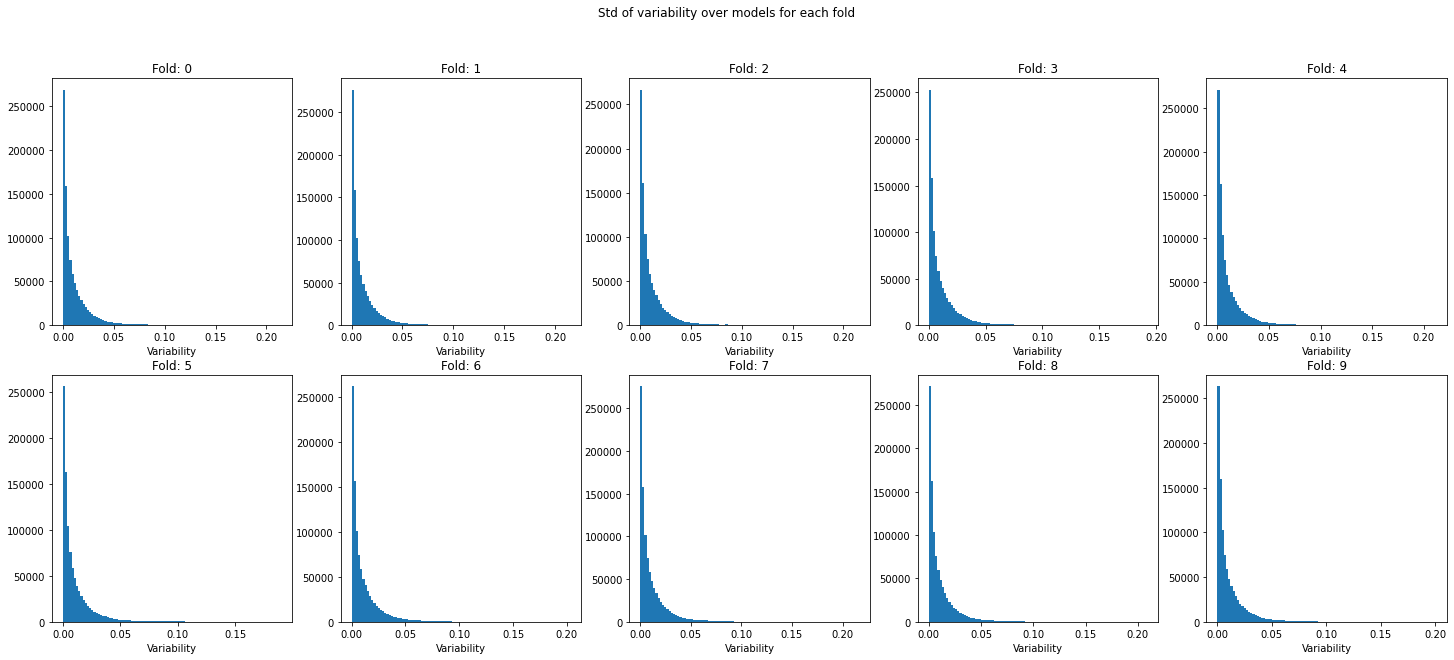

In [15]:
fig, ax = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('Std of variability over models for each fold')
fold_iterator = iter(range(NUM_FOLDS))
for i in range(2):
    for j in range(5):
        fold = next(fold_iterator)
        df_fold = df[df['fold'] == fold].groupby('guid').std()['variability']
        ax[i, j].hist(df_fold, bins=100)
        ax[i, j].set_title(f'Fold: {fold}')
        ax[i, j].set_xlabel('Variability')
plt.show()

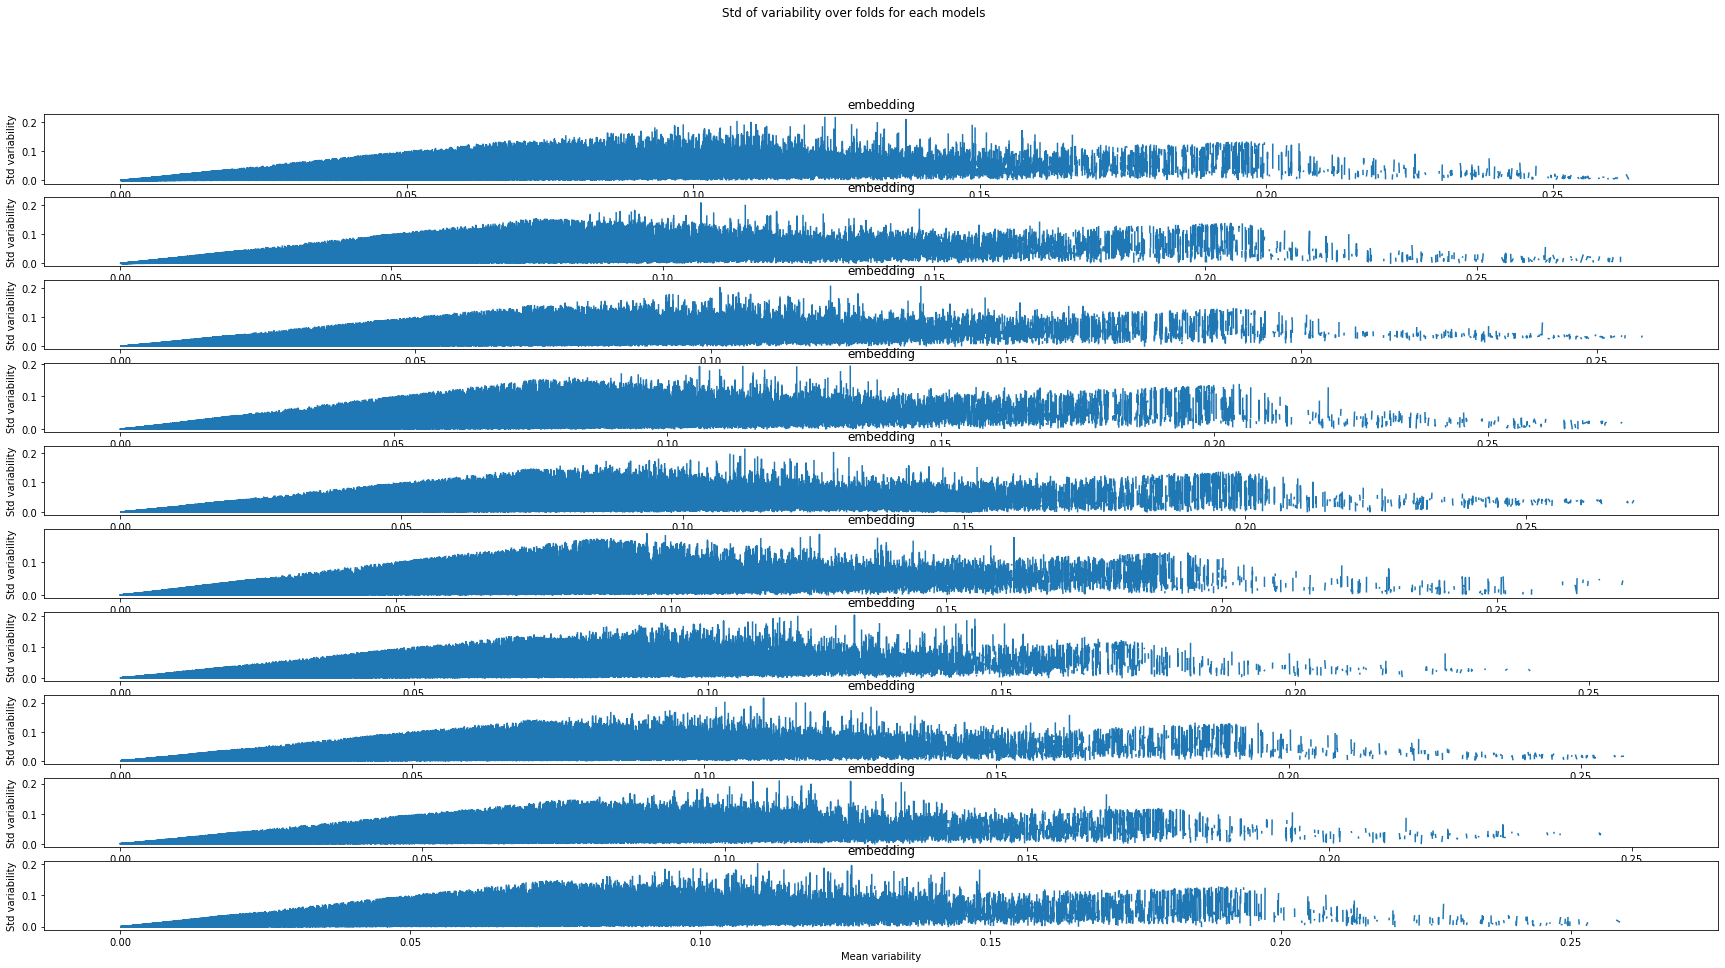

In [30]:
fig, ax = plt.subplots(10, 1, figsize=(30, 15))
fig.suptitle('Std of variability over folds for each models')
fold_iterator = iter(range(NUM_FOLDS))
for i in range(10):
    for j in range(1):
        fold = next(fold_iterator)
        df_fold = df[df['fold'] == fold].groupby('guid').agg([np.mean, np.std])['variability']
        df_sorted = df_fold.sort_values(by='mean', ascending=False)
        std = df_sorted['std']
        mean = df_sorted['mean']
        ax[i].plot(mean, std)
        ax[i].set_title(model)
        ax[i].set_ylabel('Std variability')
        ax[i].set_xlabel('Mean variability')
plt.show()

# Pareto diagrams for variability

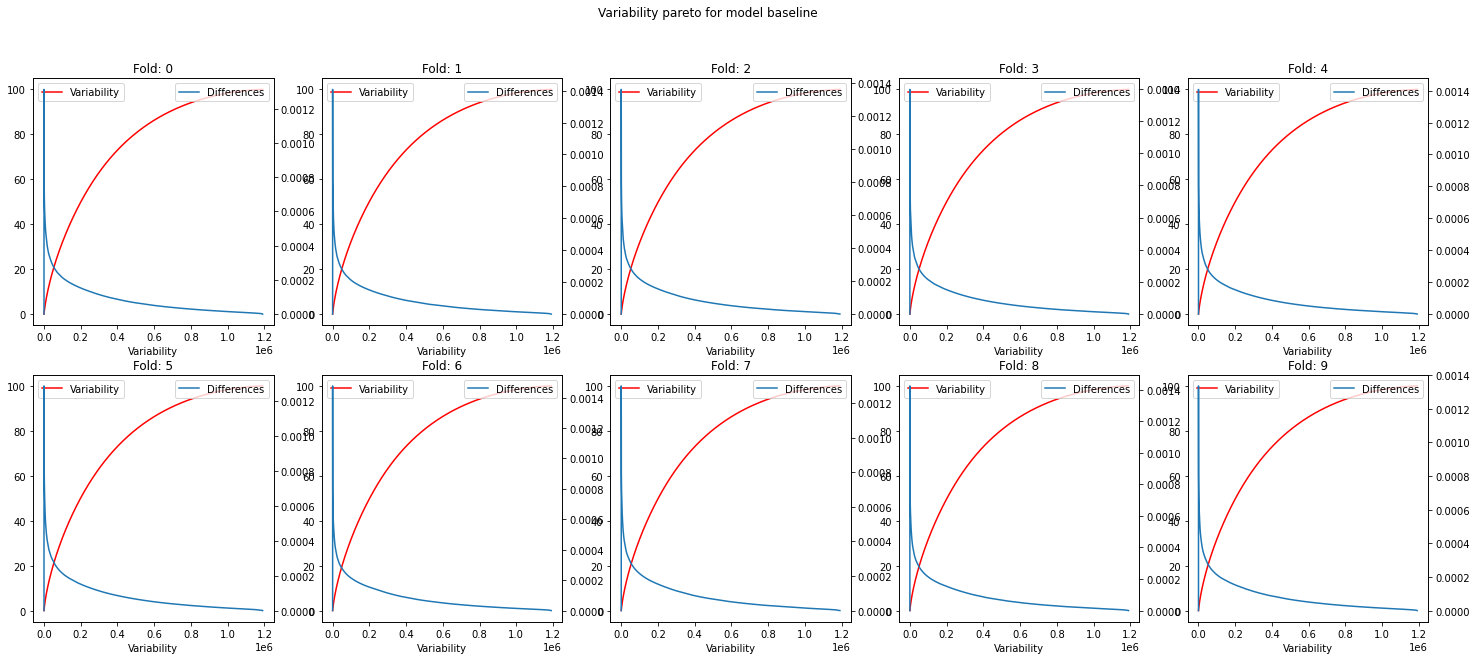

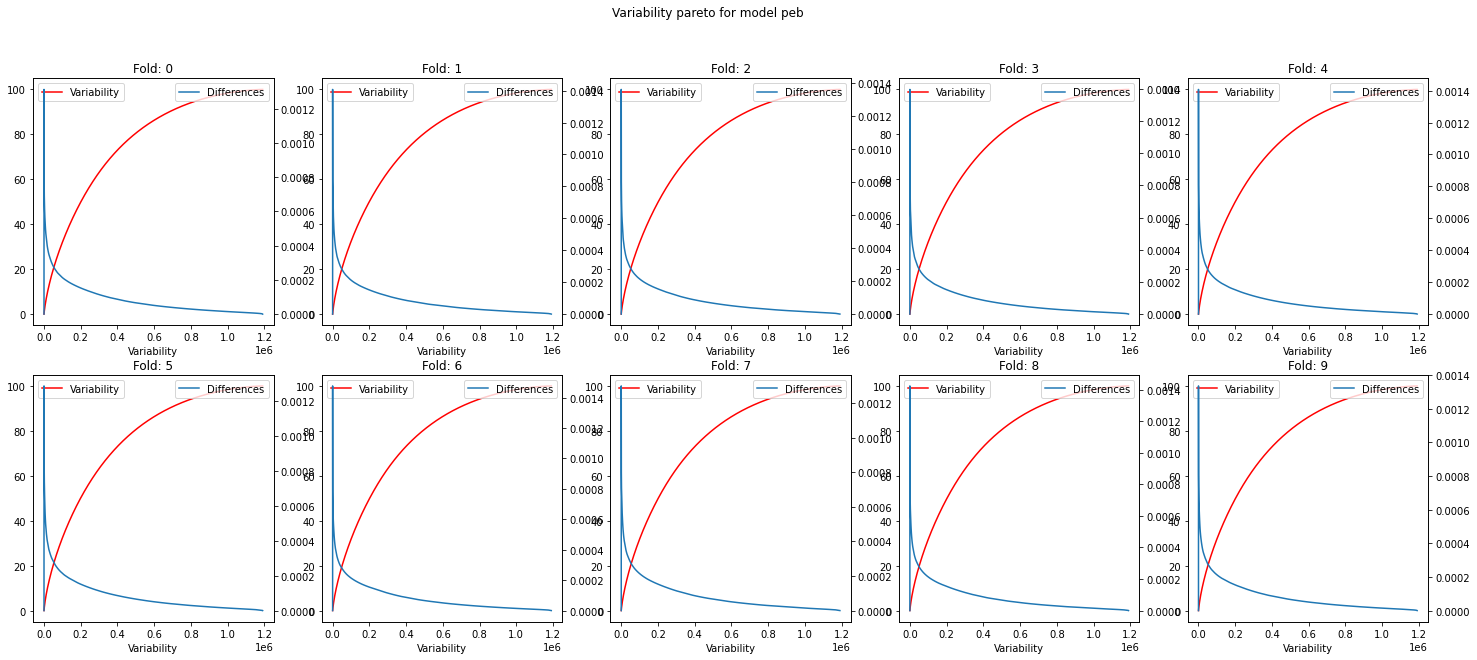

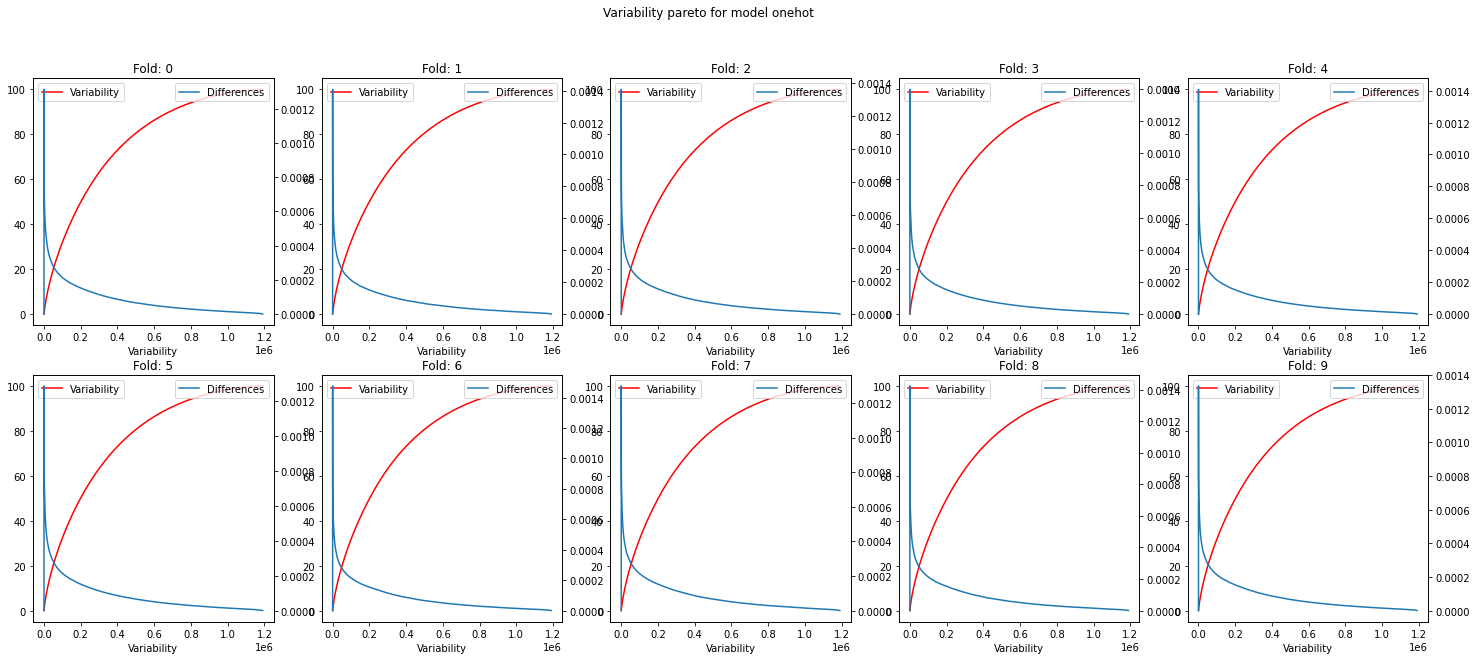

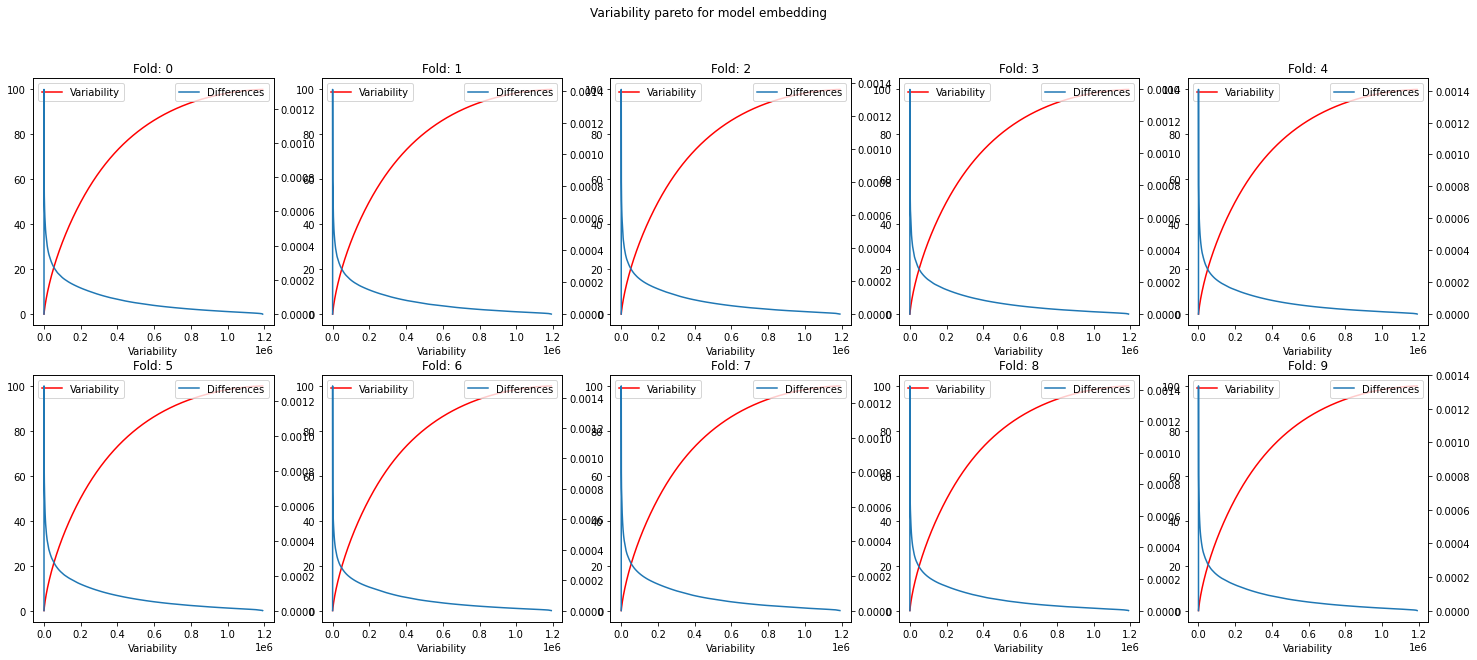

In [19]:
SHOW_PERC = 1
for model in MODELS:
    fig, axs = plt.subplots(2, 5, figsize=(25, 10))
    fig.suptitle(f'Variability pareto for model {model}')
    fold_iterator = iter(range(NUM_FOLDS))
    for i in range(2):
        for j in range(5):
            fold = next(fold_iterator)
            df_fold = df[df['fold'] == fold].groupby('guid').mean()
            df_sorted = df_fold.sort_values(by='variability', ascending=False)
            
            
            df_sorted['cumsum'] = df_sorted['variability'].cumsum() / df_sorted['variability'].sum() * 100
            
            df_sorted = df_sorted.iloc[:int(len(df_sorted) * SHOW_PERC)]
#            print(df_sorted.tail(10))
            
            
            ax = axs[i, j]
            ax2 = ax.twinx()
            ax.plot(range(len(df_sorted)), df_sorted['cumsum'], label='Variability', color='red')
            ax2.plot(range(len(df_sorted)), [0] + list(np.diff(df_sorted['cumsum'])), label='Differences')
            
            ax.set_title(f'Fold: {fold}')
            ax2.legend()
            ax.legend()
            ax.set_xlabel('Variability')
    plt.show()